STAT 453: Deep Learning (Spring 2021)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat453-ss2021/  
GitHub repository: https://github.com/rasbt/stat453-deep-learning-ss21

---

# MLP with Dropout 

## Imports

In [1]:
%env CUBLAS_WORKSPACE_CONFIG=:4096:8

env: CUBLAS_WORKSPACE_CONFIG=:4096:8


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# From local helper files
from helper_evaluation import set_all_seeds, set_deterministic
from helper_train import train_model
from helper_plotting import plot_training_loss, plot_accuracy, show_examples
from helper_dataset import get_dataloaders_mnist

## Settings and Dataset

In [4]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
set_all_seeds(RANDOM_SEED)
set_deterministic()

In [6]:
##########################
### MNIST DATASET
##########################

train_loader, valid_loader, test_loader = get_dataloaders_mnist(
    batch_size=BATCH_SIZE,
    validation_fraction=0.1)

# Checking the dataset
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Model

In [7]:
class MLPNet(torch.nn.Module):
  def __init__(self):
    super(MLPNet, self).__init__()
    self.fc1 = torch.nn.Linear(784, 256)
    self.fc2 = torch.nn.Linear(256, 256)
    self.fc3 = torch.nn.Linear(256, 10)

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = torch.nn.functional.relu(self.fc1(x))
    x = torch.nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  def name(self):
    return "MLP"

Epoch: 001/050 | Batch 0000/0210 | Loss: 2.2969
Epoch: 001/050 | Batch 0050/0210 | Loss: 1.6622
Epoch: 001/050 | Batch 0100/0210 | Loss: 0.8036
Epoch: 001/050 | Batch 0150/0210 | Loss: 0.5074
Epoch: 001/050 | Batch 0200/0210 | Loss: 0.4272
Epoch: 001/050 | Train: 88.41% | Validation: 90.95%
Time elapsed: 0.23 min
Epoch: 002/050 | Batch 0000/0210 | Loss: 0.4349
Epoch: 002/050 | Batch 0050/0210 | Loss: 0.3931
Epoch: 002/050 | Batch 0100/0210 | Loss: 0.2884
Epoch: 002/050 | Batch 0150/0210 | Loss: 0.3675
Epoch: 002/050 | Batch 0200/0210 | Loss: 0.3533
Epoch: 002/050 | Train: 90.81% | Validation: 92.73%
Time elapsed: 0.39 min
Epoch: 003/050 | Batch 0000/0210 | Loss: 0.3081
Epoch: 003/050 | Batch 0050/0210 | Loss: 0.2773
Epoch: 003/050 | Batch 0100/0210 | Loss: 0.2624
Epoch: 003/050 | Batch 0150/0210 | Loss: 0.3006
Epoch: 003/050 | Batch 0200/0210 | Loss: 0.2580
Epoch: 003/050 | Train: 92.38% | Validation: 93.73%
Time elapsed: 0.54 min
Epoch: 004/050 | Batch 0000/0210 | Loss: 0.2629
Epoch: 

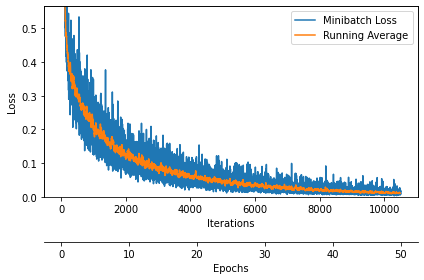

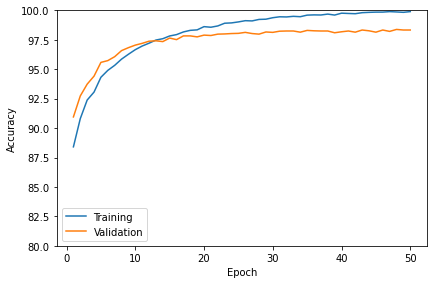

In [8]:
torch.manual_seed(RANDOM_SEED)
model = MLPNet()
model = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.0001)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0001)

# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
#                                                        factor=0.1,
#                                                        mode='min',
#                                                        verbose=True)

minibatch_loss_list, train_acc_list, valid_acc_list = train_model(
    model=model,
    num_epochs=NUM_EPOCHS,
    train_loader=train_loader,
    valid_loader=valid_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    device=DEVICE)

plot_training_loss(minibatch_loss_list=minibatch_loss_list,
                   num_epochs=NUM_EPOCHS,
                   iter_per_epoch=len(train_loader),
                   results_dir=None,
                   averaging_iterations=20)
plt.show()

plot_accuracy(train_acc_list=train_acc_list,
              valid_acc_list=valid_acc_list,
              results_dir=None)
plt.ylim([80, 100])
plt.show()